# Introduction
This notebook provides an introduction to the algorithm to solve the minimal return altitude problem (MRAP).
This notebook only contains simple examples with artificial data.

In [1]:
# Import modules.
import numpy as np
import matplotlib.pyplot as plt
import glikonal_mrap as mrap

In [2]:
def euclidean_distance_matrix(src_x,src_y,H,W,hx,hy):
    dist_mat=np.zeros([W,H])
    for x in range(W):
        for y in range(H):
            dist_mat[x,y]=np.sqrt(hx**2*(x-src_x)**2+hy**2*(y-src_y)**2)
    return dist_mat

# No terrain
We start by finding the classical gliding cone, in the case without obstacles.
Hence we set the elevation of all points in the grid to zero.

In [3]:
#set the grid parameters
H=100 #height, or number fo points in the y direction
W=100 #width, or number of points in the x direction
h=1 #spacing between two neighbouring points on the grid
elevation=np.zeros([W,H])
airfield_pos=(H//2,W//2)
init_altitude=0
g=1 #glide ratio

In [4]:
radius=3 # Radius of the circle centered at the airfield, where the solution is computed analytically using the point source HJB equation.

init_nodes,init_values=mrap.point_source_HJB_uniform_solver_MRAP(airfield_pos,init_altitude,radius,H,W,h,g)
min_altitude=mrap.FMM_MRAP(init_nodes, init_values, elevation,h,g,H,W)

In this example we place the arifield in the middle of the grid, and we assume a glide ratio of 1.

### Plotting the results

/var/folders/n8/dxqjckvd4wl4l8rpd0n20xrw0000gp/T/ipykernel_33791/730533009.py:11: RuntimeWarning: divide by zero encountered in divide
  grid_chars=np.einsum('ijk,ij->ijk',grid_chars,1./np.linalg.norm(grid_chars,axis=2))


Text(0.5, 1.0, 'Level sets ofthe minimal altitude function')

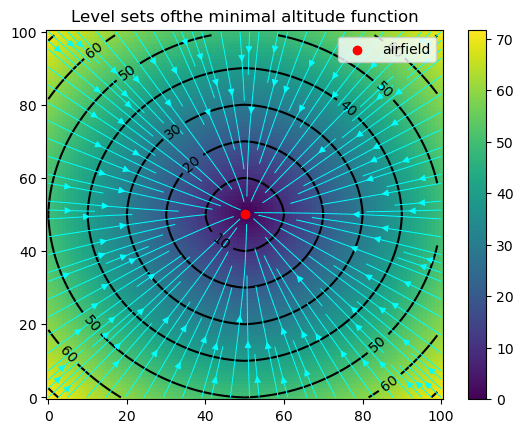

In [5]:
# plot the minimal altitude surface
# we plot it both showing its level sets (i.e. curves with constant altitude), and using the contiuous color range.
x=np.linspace(0,W*h,W)
y=np.linspace(0,H*h,H)
xx,yy=np.meshgrid(x,y)
plt.pcolormesh(xx,yy,min_altitude)
plt.colorbar()
CS=plt.contour(min_altitude,levels=[10,20,30,40,50,60,70,80,90,100],colors='black')
plt.clabel(CS, CS.levels, inline=True, fontsize=10)
grid_chars=np.moveaxis(np.array(np.gradient(min_altitude)),0,2)
grid_chars=np.einsum('ijk,ij->ijk',grid_chars,1./np.linalg.norm(grid_chars,axis=2))
plt.streamplot(xx,yy,-grid_chars[:,:,1],-grid_chars[:,:,0],density=1.4,color='aqua',linewidth=0.7)

plt.scatter(airfield_pos[1],airfield_pos[0],c="red",label="airfield")

plt.legend(loc="upper right")
plt.title("Level sets ofthe minimal altitude function")

Text(0.5, 0.92, 'Gliding cone')

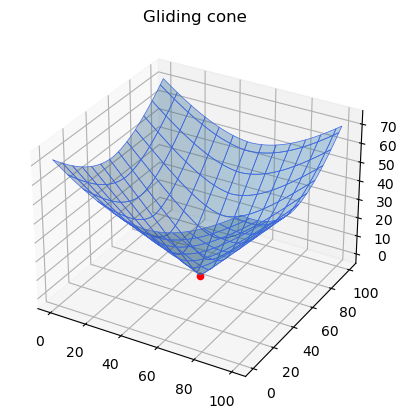

In [6]:
#3D surface representing the gliding cone.
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(xx,yy, min_altitude, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3,label="minimal altitude")
ax.scatter(airfield_pos[1],airfield_pos[0],init_altitude,color="red",label="airfield")
plt.title("Gliding cone")

### Checking correctness
At least in this simple case wothout obstacles we alreay know the exact solution. We can check how well our numerical solver approximates the true solution.
The following plot shows the percentual error of our solution (e.). The higher the worse)

Text(0.5, 1.0, 'total error ')

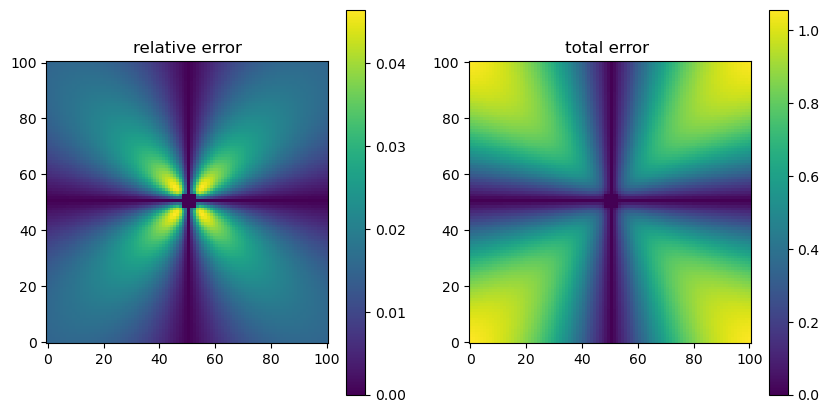

In [7]:
#finding the true solution
radius=np.sqrt((H*h)**2+(h*W)**2)
true_min_altitude=np.zeros([H,W])
init_nodes,init_values=mrap.point_source_HJB_uniform_solver_MRAP(airfield_pos,init_altitude,radius,H,W,h,g)
for i,pos in enumerate(init_nodes):
    true_min_altitude[pos]=init_values[i]


X,Y=np.meshgrid(np.linspace(0,h*W,W),np.linspace(0,h*H,H))
fig,axes=plt.subplots(1,2,figsize=(10,5))
grid_gained_altitude=min_altitude-init_altitude
true_grid_gained_altitude=true_min_altitude-init_altitude
tot_error=(grid_gained_altitude-true_grid_gained_altitude)
rel_error=tot_error/(true_grid_gained_altitude+1e-10)

im1=axesim1=axes[0].pcolormesh(X,Y,rel_error,cmap='viridis',shading='nearest')
im2=axes[1].pcolormesh(X,Y,tot_error,cmap='viridis',shading='nearest')

fig.colorbar(im1,ax=axes[0])
fig.colorbar(im2,ax=axes[1])

#CS=ax.contour(X,Y,rel_error,colors='k')
#ax.clabel(CS, fontsize=9, inline=True)
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

axes[0].set_title('relative error')
axes[1].set_title('total error ')

The result is that on most of the domain the altitude we obtained numerically is within $1\%$ of the true altitude value. Moreover, moving further from the airfield this error decreases.

# Single peak
In this section we look at how terrain modifies our gliding cone. A simple example to start with is that of a single mountain with flat land around it.

In [8]:
#set the grid parameters
H=100 #height, or number fo points in the y direction
W=100 #width, or number of points in the x direction
h=1 #spacing between two neighbouring points on the grid
elevation=np.zeros([W,H])
airfield_pos=(H//2,0)
init_altitude=0
g=1 #glide ratio

xx,yy=np.meshgrid(np.arange(0,W,h,dtype=np.intc),np.arange(0,H,h,dtype=np.intc))
center=[50,50]
elevation_profile=160*np.exp(-((xx-center[0])**2+(yy-center[1])**2)/180) #set the elevation profile


In [9]:
radius=3 # Radius of the circle centered at the airfield, where the solution is computed analytically using the point source HJB equation.

init_nodes,init_values=mrap.point_source_HJB_uniform_solver_MRAP(airfield_pos,init_altitude,radius,H,W,h,g)
min_altitude=mrap.FMM_MRAP(init_nodes, init_values, elevation_profile,h,g,H,W)

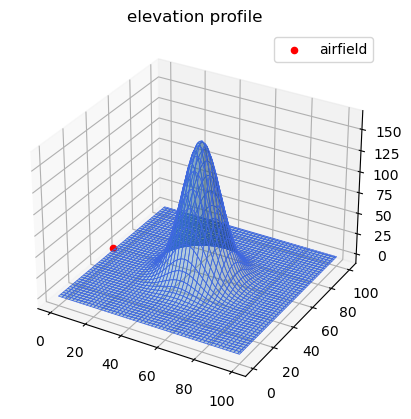

In [10]:
#3D surface representing the gliding cone.
x=np.linspace(0,W*h,W)
y=np.linspace(0,H*h,H)
xx,yy=np.meshgrid(x,y)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(xx,yy, elevation_profile, edgecolor='royalblue', lw=0.5, rstride=2, cstride=2,alpha=0.3)
ax.scatter(airfield_pos[1],airfield_pos[0],2,c="red",label="airfield",zorder=1)
plt.title("elevation profile")
plt.legend()

Now plot the solution (i.e. the minimal altitude profile).
The minimal altitude level sets are plotted in white, while the background represents the elevation profile.
One sees how the moving front "wraps" around the mountain.

Text(0.5, 1.0, 'Minimal altitude lines (white), plotted on top of the elevaton profile')

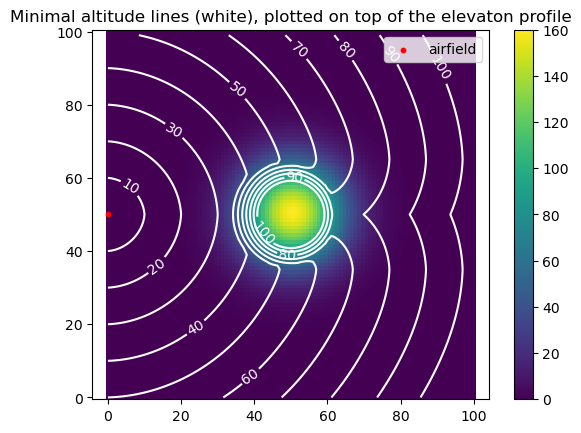

In [11]:
CS=plt.contour(min_altitude,levels=[10,20,30,40,50,60,70,80,90,100],colors="white")
plt.clabel(CS, CS.levels, inline=True, fontsize=10)
plt.axis('equal')
plt.scatter(airfield_pos[1],airfield_pos[0],c="red",label="airfield",s=10,zorder=3)
plt.pcolormesh(xx,yy,elevation_profile)
plt.legend()
plt.colorbar()
plt.title("Minimal altitude lines (white), plotted on top of the elevaton profile")
#plt.savefig("pics/single_peak_min_altitude.png",dpi=150,bbox_inches="tight")

Text(0.5, 0.92, 'Minimal altitude (green) and elevation profile (blue)')

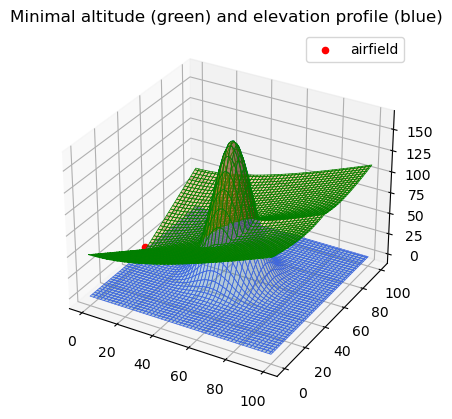

In [12]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(xx,yy, elevation_profile, edgecolor='royalblue', lw=0.5, rstride=2, cstride=2,alpha=0.3)
ax.plot_surface(xx,yy, min_altitude, edgecolor='green', lw=0.5, rstride=2, cstride=2,alpha=0.3)
ax.scatter(airfield_pos[1],airfield_pos[0],4,c="red",label="airfield",zorder=100)
plt.title("elevation profile")
plt.legend()
plt.title("Minimal altitude (green) and elevation profile (blue)")
#plt.savefig("pics/min_altitude_single_peak_3d.png",dpi=150,bbox_inches='tight')

Next we compute the re-entry paths using the same method as in the previous example (i.e. we take the gradient of the minimal altitude function and we intrgrate vit to find the curves).
At this point we should empahsize that the paths computed by the algorithm are not necessarily optimal. This means that, for a given starting point, there could be a different path that results in a smaller loss of altitude. 


The algorihtm instead produces paths that are **safe**. This means that:
1. All proposed paths will  avoid terrain
2. All proposed paths satify the glide ratio constraint (i.e. at all points of the path the maximum glide ratio required is the one given to the algorithm).

/var/folders/n8/dxqjckvd4wl4l8rpd0n20xrw0000gp/T/ipykernel_33791/2493830019.py:3: RuntimeWarning: divide by zero encountered in divide
  grid_chars=np.einsum('ijk,ij->ijk',grid_chars,1./np.linalg.norm(grid_chars,axis=2))


Text(0.5, 1.0, 'Re-entry paths plotted on top of the elevation profile')

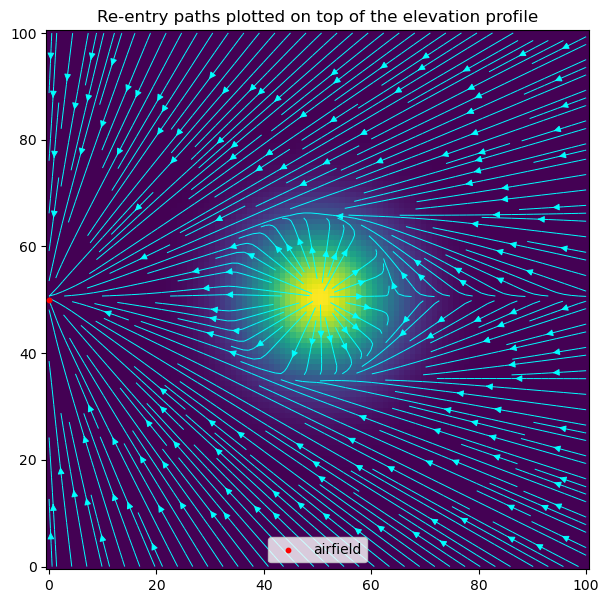

In [13]:
plt.figure(figsize=(7,7))
grid_chars=np.moveaxis(np.array(np.gradient(min_altitude)),0,2)
grid_chars=np.einsum('ijk,ij->ijk',grid_chars,1./np.linalg.norm(grid_chars,axis=2))
plt.streamplot(xx,yy,-grid_chars[:,:,1],-grid_chars[:,:,0],density=2.4,color='aqua',linewidth=0.7)
plt.pcolormesh(xx,yy,elevation_profile)
plt.scatter(airfield_pos[1],airfield_pos[0],c="red",label="airfield",s=10,zorder=3)
plt.legend()
plt.title("Re-entry paths plotted on top of the elevation profile")
#plt.savefig("pics/reentry_paths_single_peak.png",dpi=150,bbox_inches='tight')

# Mountain range with two saddles (cols)
Here we simulate the landscape of a mountain with two saddles. The saddles represent the best place to pass the mountain range.
The two saddles have different height, with one saddle higher than the other.


In [14]:
H=100
W=100
xx,yy=np.meshgrid(np.arange(0,W,h,dtype=np.intc),np.arange(0,H,h,dtype=np.intc))
peak_x=40
elevation_profile=85*np.exp(-(xx-peak_x)**2/40)
saddle_1_y=20
saddle_1_strength=20 #the higher the strength the lower the top of the saddle
saddle_2_y=80
saddle_2_strength=45
elevation_profile=np.maximum(0,elevation_profile-saddle_1_strength*np.exp(-(yy-saddle_1_y)**2/10)-saddle_2_strength*np.exp(-(yy-saddle_2_y)**2/10))

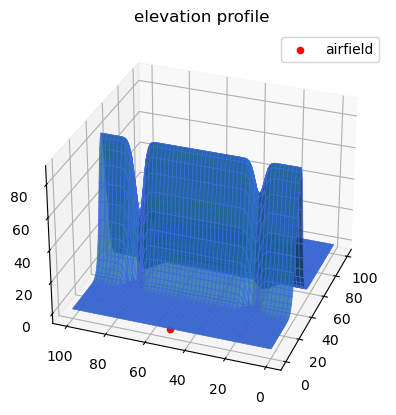

In [15]:
#3D surface representing the elevation profile.
x=np.linspace(0,W*h,W)
y=np.linspace(0,H*h,H)
xx,yy=np.meshgrid(x,y)
airfield_pos=(H//2,0)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(xx,yy, elevation_profile, edgecolor='royalblue', lw=0.5, rstride=2, cstride=1,alpha=0.8)
ax.scatter(airfield_pos[1],airfield_pos[0],0,c="red",label="airfield",zorder=0)
ax.view_init(30,200)
plt.title("elevation profile")
plt.legend()

In [16]:
radius=3 # Radius of the circle centered at the airfield, where the solution is computed analytically using the point source HJB equation.

init_nodes,init_values=mrap.point_source_HJB_uniform_solver_MRAP(airfield_pos,init_altitude,radius,H,W,h,g)
min_altitude=mrap.FMM_MRAP(init_nodes, init_values, elevation_profile,h,g,H,W)

Text(0.5, 1.0, 'Minimal altitude lines (white) plotted on top of the elevation profile')

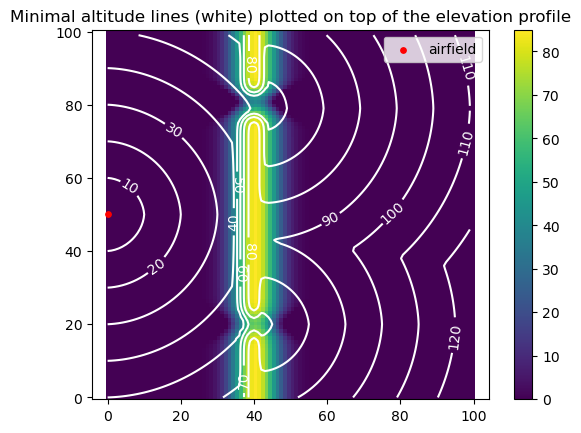

In [17]:
CS=plt.contour(min_altitude,levels=[10,20,30,40,50,60,70,80,90,100,110,120],colors="white")
plt.clabel(CS, CS.levels, inline=True, fontsize=10)
x=np.linspace(0,W*h,W)
y=np.linspace(0,H*h,H)
xx,yy=np.meshgrid(x,y)
plt.pcolormesh(xx,yy,elevation_profile)
plt.axis('equal')
plt.colorbar()
plt.scatter(airfield_pos[1],airfield_pos[0],c="red",label="airfield",s=15,zorder=3)
plt.legend()
plt.title("Minimal altitude lines (white) plotted on top of the elevation profile")
#plt.savefig("pics/two_saddles_min_altitude.png",dpi=150,bbox_inches='tight')

Text(0.5, 0.92, 'Minimal altitude (green) and elevation profile (blue)')

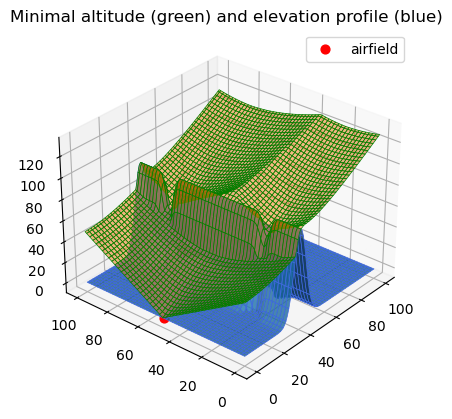

In [18]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(xx,yy, elevation_profile, edgecolor='royalblue', lw=0.5, rstride=2, cstride=2,alpha=0.8)
ax.plot_surface(xx,yy,min_altitude, edgecolor='green', lw=0.5, rstride=2, cstride=2,alpha=0.5)
ax.scatter(airfield_pos[1],airfield_pos[0],0,c="red",label="airfield",s=40,zorder=0)
ax.view_init(30,220)

plt.title("elevation profile")
plt.legend()
plt.title("Minimal altitude (green) and elevation profile (blue)")
#plt.savefig("pics/min_altitude_two_saddles_3d.png",dpi=150,bbox_inches='tight')

/var/folders/n8/dxqjckvd4wl4l8rpd0n20xrw0000gp/T/ipykernel_33791/2493830019.py:3: RuntimeWarning: divide by zero encountered in divide
  grid_chars=np.einsum('ijk,ij->ijk',grid_chars,1./np.linalg.norm(grid_chars,axis=2))


Text(0.5, 1.0, 'Re-entry paths plotted on top of the elevation profile')

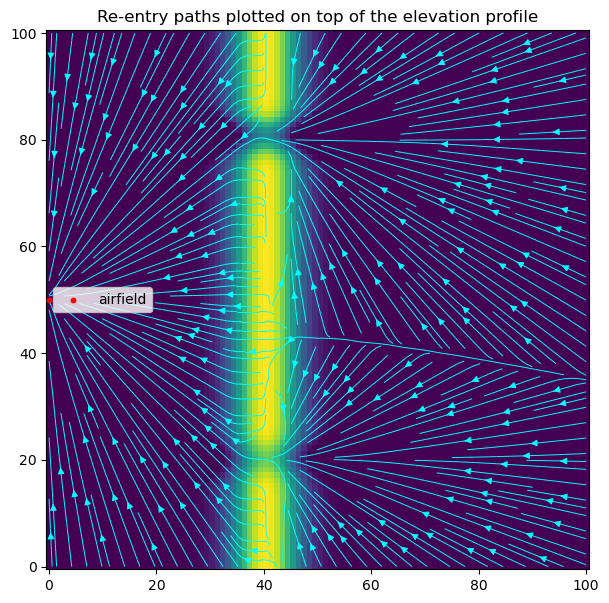

In [19]:
plt.figure(figsize=(7,7))
grid_chars=np.moveaxis(np.array(np.gradient(min_altitude)),0,2)
grid_chars=np.einsum('ijk,ij->ijk',grid_chars,1./np.linalg.norm(grid_chars,axis=2))
plt.streamplot(xx,yy,-grid_chars[:,:,1],-grid_chars[:,:,0],density=2.4,color='aqua',linewidth=0.7)
plt.pcolormesh(xx,yy,elevation_profile)
plt.scatter(airfield_pos[1],airfield_pos[0],c="red",label="airfield",s=10,zorder=3)
plt.legend()
plt.title("Re-entry paths plotted on top of the elevation profile")
#plt.savefig("pics/reentry_paths_single_peak.png",dpi=150,bbox_inches='tight')

In this example it is interesting to notice that if one is on the right side of the mountain range and must come back to the airport, then depending on his position there is an optimal choice for the saddle to use. In other words each saddle has a certain basin of attraction. This algorithm then allows to pick the most convenient saddle given the starting point.